In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\yashh\\OneDrive\\Desktop\\CS 4375\\hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33,40.7,1
1,50,37.2,1
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

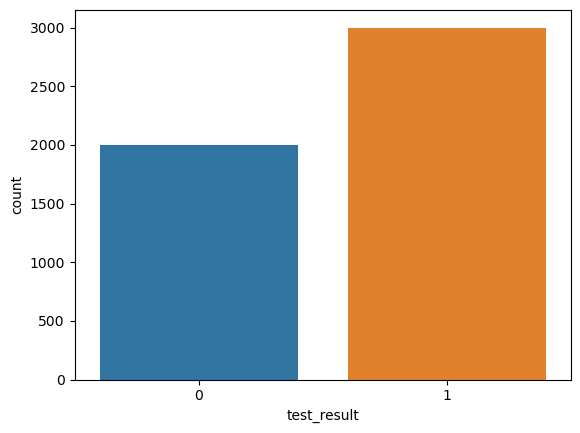

In [7]:
sns.countplot(data=df, x = 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

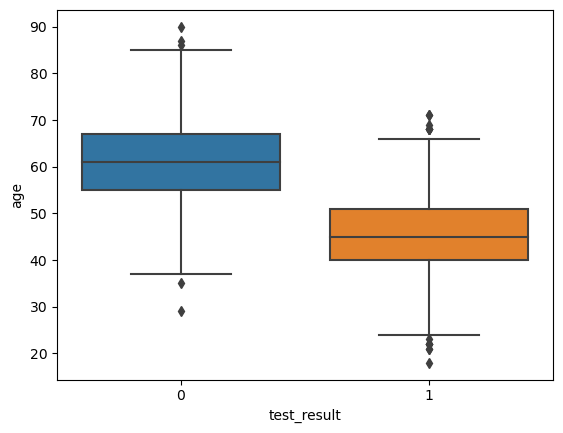

In [8]:
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

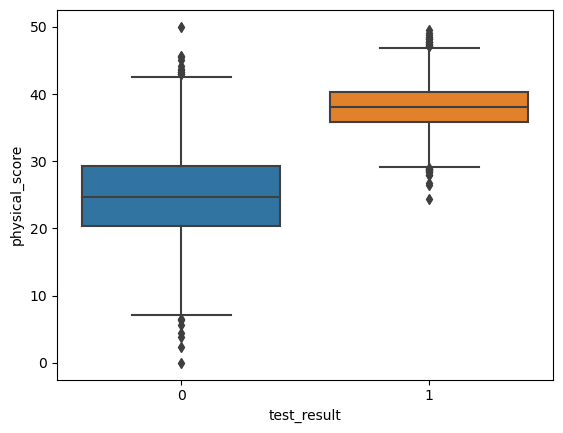

In [9]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

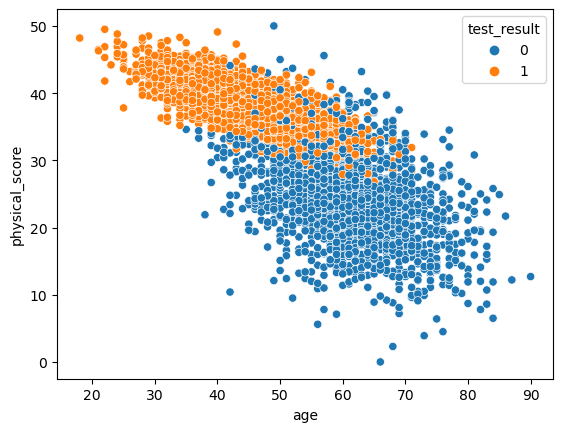

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

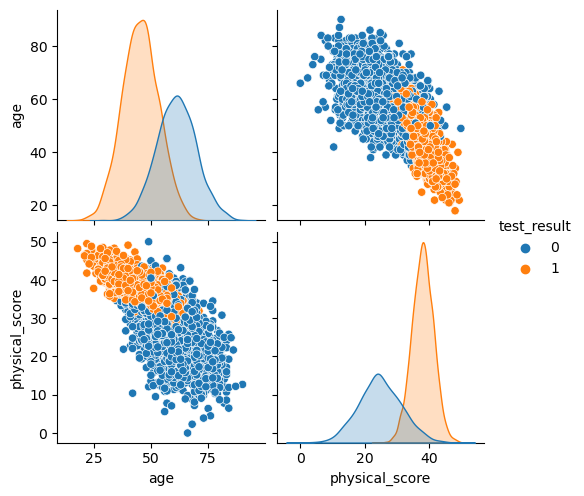

In [12]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

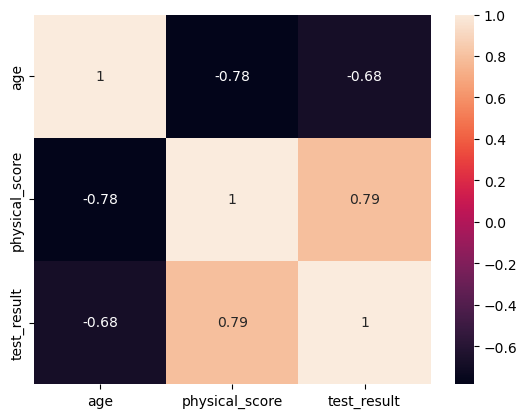

In [13]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

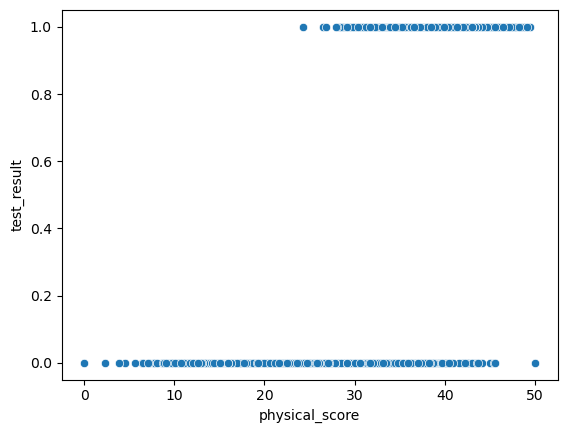

In [14]:
sns.scatterplot(x='physical_score', y='test_result', data = df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

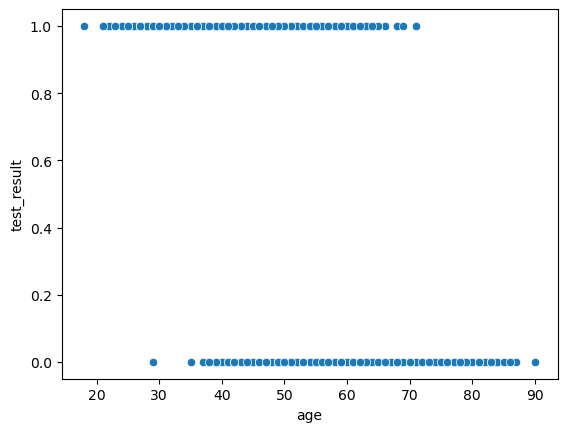

In [15]:
sns.scatterplot(x='age', y='test_result', data = df)

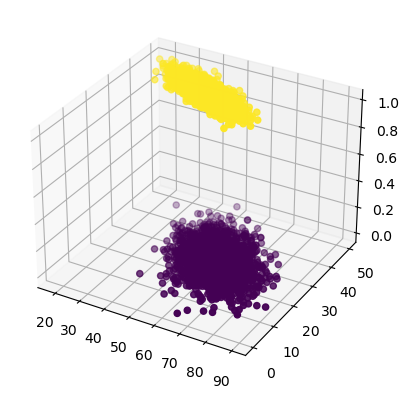

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [19]:
df.head()

,age,physical_score,test_result
0,33,40.7,1
1,50,37.2,1
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1


In [20]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [21]:
X.head()

,age,physical_score
0,33,40.7
1,50,37.2
2,52,24.7
3,56,31.0
4,35,42.9


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [24]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [32]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [33]:
scaled_X_train

array([[-1.75380782,  1.25931551],
       [ 0.91476804, -0.61814349],
       [-1.04218759,  2.00784491],
       ...,
       [ 1.18162562, -1.41575679],
       [ 2.78277114, -1.05989855],
       [-1.93171288,  1.17341869]])

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [34]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:
------
This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Model Performance and on Classification Tasks

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.924

In [36]:
confusion_matrix(y_test, y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

In [39]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined